In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv('china_gdp.csv')

x_data, y_data = (df["Year"].values, df["Value"].values)

df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


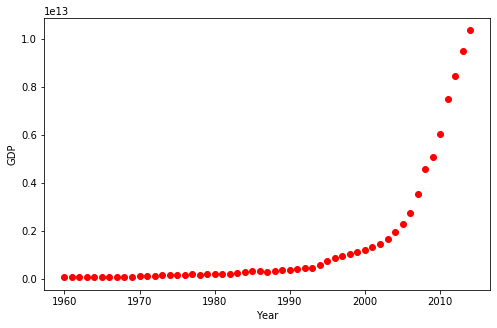

In [33]:
plt.figure(figsize = (8,5))

plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

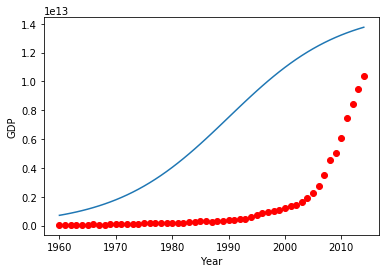

In [31]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

plt.ylabel('GDP')
plt.xlabel('Year')

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [18]:
# Our task here is to find the best parameters for our model. 
# Lets first normalize our x and y:

In [22]:
# Lets normalize our data

xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [25]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


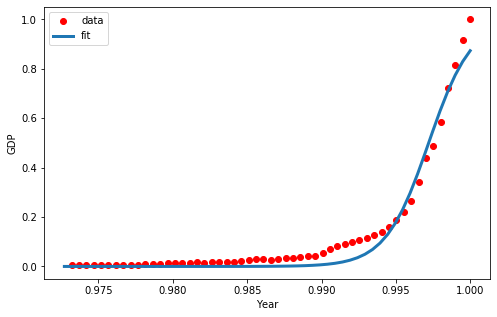

In [26]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [27]:
# split data into train/test

msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [29]:
# build the model using train set

popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set

y_hat = sigmoid(test_x, *popt)

In [35]:
# evaluation

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))

from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.91
